# Classification_LR_Keras (2)

## Method

Build simple Logistic Regression model with Keras.

```
X_train: 10000 samples * 5 times of training
X_test: 10000 samples

* used (X_test, Y_test) in validation data.

batch_size: 128
epochs: 100
```

In [1]:
import pickle

def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# import metadata
metadata = unpickle('clf_data/batches.meta')
labels = metadata[b'label_names']
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [5]:
# import train batch
dataset = unpickle('clf_data/data_batch_1')

X_train = [dataset[b'data']]
y_train = [dataset[b'labels']]

for i in range(2,6):
    batch = unpickle(f'clf_data/data_batch_{i}')
    batch_X = batch[b'data']
    batch_y = batch[b'labels']
    
    X_train.append(batch_X)
    y_train.append(batch_y)

len(X_train), len(y_train)

(5, 5)

In [6]:
# import test batch
dataset_test = unpickle('clf_data/test_batch')

X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']

X_test.shape, len(y_test)

((10000, 3072), 10000)

In [8]:
X_train = [_batch / 255.0 for _batch in X_train]
X_test = X_test / 255.0
X_train[0][0]

array([0.23137255, 0.16862745, 0.19607843, ..., 0.54901961, 0.32941176,
       0.28235294])

## Data categorize

In [9]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
output_dim = nb_classes = 10

In [17]:
input_dim = X_train[0].shape[1]
X_train = [_batch.astype('float32') for _batch in X_train]
X_test = X_test.astype('float32')
Y_train = [np_utils.to_categorical(_batch, nb_classes) for _batch in y_train]
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [18]:
input_dim, X_train[0].shape, Y_train[0].shape

(3072, (10000, 3072), (10000, 10))

## Build Model

In [23]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size=128
epochs=30

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = []

for i in range(5):
    hist = model.fit(X_train[i], Y_train[i],
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
    history.append(hist)

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 1s 90us/step - loss: 2.1735 - accuracy: 0.1987 - val_loss: 2.1737 - val_accuracy: 0.2119
Epoch 2/30
10000/10000 [==============================] - 1s 90us/step - loss: 2.0248 - accuracy: 0.2790 - val_loss: 2.1564 - val_accuracy: 0.2130
Epoch 3/30
10000/10000 [==============================] - 1s 87us/step - loss: 1.9596 - accuracy: 0.3053 - val_loss: 2.1543 - val_accuracy: 0.2157
Epoch 4/30
10000/10000 [==============================] - 1s 82us/step - loss: 1.9184 - accuracy: 0.3274 - val_loss: 1.9592 - val_accuracy: 0.2931
Epoch 5/30
10000/10000 [==============================] - 1s 83us/step - loss: 1.8915 - accuracy: 0.3336 - val_loss: 1.9259 - val_accuracy: 0.3230
Epoch 6/30
10000/10000 [==============================] - 1s 85us/step - loss: 1.8710 - accuracy: 0.3484 - val_loss: 2.0516 - val_accuracy: 0.2328
Epoch 7/30
10000/10000 [==============================] - 1s 83us/st

Epoch 26/30
10000/10000 [==============================] - 1s 88us/step - loss: 1.7364 - accuracy: 0.4056 - val_loss: 1.8374 - val_accuracy: 0.3517
Epoch 27/30
10000/10000 [==============================] - 1s 87us/step - loss: 1.7335 - accuracy: 0.4086 - val_loss: 1.9650 - val_accuracy: 0.3016
Epoch 28/30
10000/10000 [==============================] - 1s 92us/step - loss: 1.7313 - accuracy: 0.4117 - val_loss: 1.8732 - val_accuracy: 0.3431
Epoch 29/30
10000/10000 [==============================] - 1s 84us/step - loss: 1.7304 - accuracy: 0.4072 - val_loss: 1.8669 - val_accuracy: 0.3294
Epoch 30/30
10000/10000 [==============================] - 1s 88us/step - loss: 1.7259 - accuracy: 0.4090 - val_loss: 1.9710 - val_accuracy: 0.2949
Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 1s 87us/step - loss: 1.7631 - accuracy: 0.3817 - val_loss: 1.8443 - val_accuracy: 0.3551
Epoch 2/30
10000/10000 [==============================] - 1s 98

Epoch 21/30
10000/10000 [==============================] - 1s 94us/step - loss: 1.7049 - accuracy: 0.4185 - val_loss: 1.8058 - val_accuracy: 0.3728
Epoch 22/30
10000/10000 [==============================] - 1s 92us/step - loss: 1.6972 - accuracy: 0.4199 - val_loss: 1.7695 - val_accuracy: 0.3873
Epoch 23/30
10000/10000 [==============================] - 1s 90us/step - loss: 1.6993 - accuracy: 0.4149 - val_loss: 1.8645 - val_accuracy: 0.3353
Epoch 24/30
10000/10000 [==============================] - 1s 94us/step - loss: 1.6991 - accuracy: 0.4174 - val_loss: 1.8579 - val_accuracy: 0.3531
Epoch 25/30
10000/10000 [==============================] - 1s 94us/step - loss: 1.6957 - accuracy: 0.4210 - val_loss: 1.8713 - val_accuracy: 0.3494
Epoch 26/30
10000/10000 [==============================] - 1s 89us/step - loss: 1.6916 - accuracy: 0.4245 - val_loss: 1.8542 - val_accuracy: 0.3363
Epoch 27/30
10000/10000 [==============================] - 1s 88us/step - loss: 1.6929 - accuracy: 0.4217 - val_

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 1.8303143810272218
Test accuracy: 0.35929998755455017


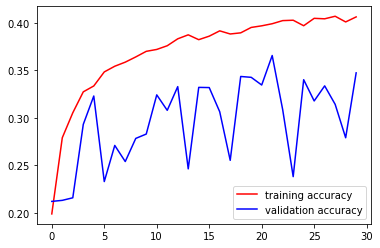

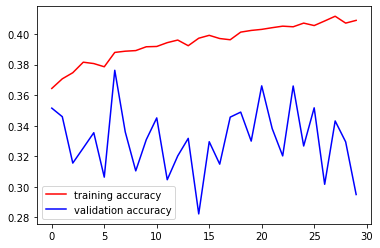

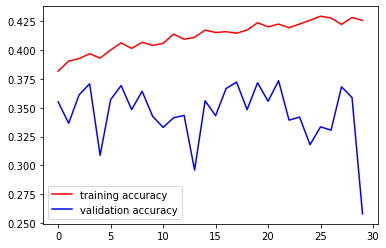

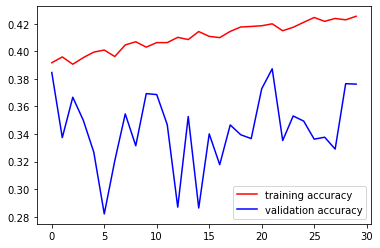

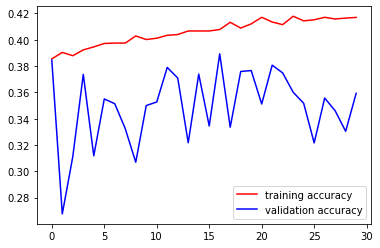

In [28]:
for i in range(len(history)):
    plt.plot(history[i].history['accuracy'],'r')
    plt.plot(history[i].history['val_accuracy'],'b')
    plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
    plt.show()

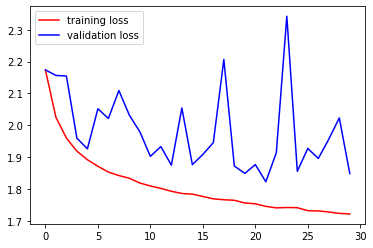

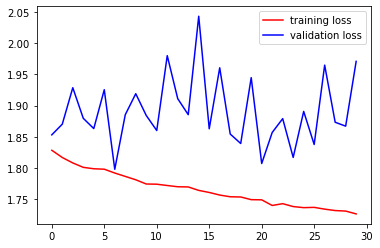

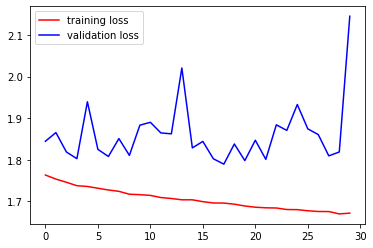

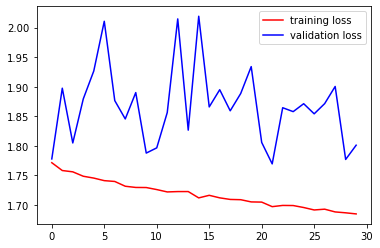

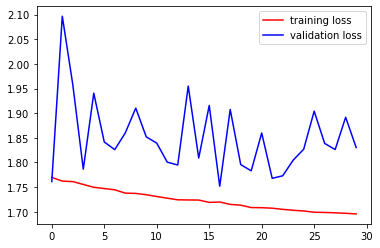

In [29]:
for i in range(len(history)):
    plt.plot(history[i].history['loss'],'r')
    plt.plot(history[i].history['val_loss'],'b')
    plt.legend({'training loss':'r', 'validation loss': 'b'})
    plt.show()

## Inference

In [30]:
predictions = model.predict_classes(X_test)

In [31]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


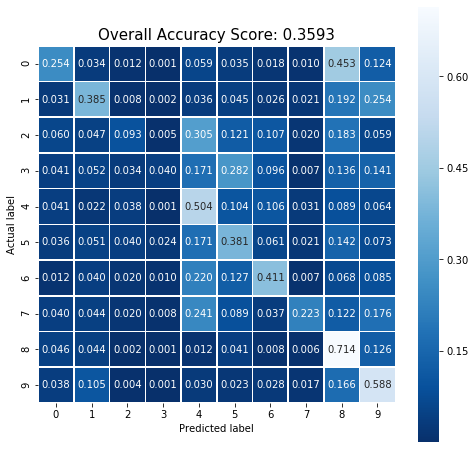

In [32]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();